In [3]:
import numpy as np
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.wcs import WCS
from astropy.io import fits

from matplotlib.colors import LogNorm

from astropy.utils.data import download_file

catalog_path='/Users/EvanB.LAPTOP-8CHCIOMA/Downloads/'

#A100-NSA Catalog
myTab=Table.read(catalog_path+'a100-nsa-for-adap.fits')

In [11]:
# SNR cut: GALEX NUV or WISE 12um SNR > 20
snrmin = 20
W3snr = myTab['w3_nanomaggies']
W3snr_ivar = myTab['w3_nanomaggies_ivar']
W3snr = W3snr*np.sqrt(W3snr_ivar)
W3flag = (W3snr>snrmin) | (myTab['W3SNR']>snrmin)  
GALEXsnr = myTab['NMGY'][:,1]
GALEXsnr_ivar = myTab['NMGY_IVAR'][:,1]
GALEXsnr = GALEXsnr*np.sqrt(GALEXsnr_ivar)
NUVflag = GALEXsnr>snrmin
SNRflag20 = W3flag | NUVflag

In [10]:
# Size cut: r-band effective radii greater than two pixels (> 5.500" ) in the unWISE images
radmin = 5.500
rad_eff1 = myTab['SERSIC_TH50']
rad_eff2 = myTab['petroR50_r']
sizeflag55 = (rad_eff1>radmin) | (rad_eff2>radmin)

In [8]:
# SNR cut: GALEX NUV or WISE 12um SNR > 20
snrmin = 10
W3snr = myTab['w3_nanomaggies']
W3snr_ivar = myTab['w3_nanomaggies_ivar']
W3snr = W3snr*np.sqrt(W3snr_ivar)
W3flag = (W3snr>snrmin) | (myTab['W3SNR']>snrmin)  
GALEXsnr = myTab['NMGY'][:,1]
GALEXsnr_ivar = myTab['NMGY_IVAR'][:,1]
GALEXsnr = GALEXsnr*np.sqrt(GALEXsnr_ivar)
NUVflag = GALEXsnr>snrmin
SNRflag10 = W3flag | NUVflag

In [14]:
# Size cut: r-band effective radii greater than two pixels (> 6.500" ) in the unWISE images
radmin = 6.500
rad_eff1 = myTab['SERSIC_TH50']
rad_eff2 = myTab['petroR50_r']
sizeflag65 = (rad_eff1>radmin) | (rad_eff2>radmin)

In [7]:
# Redshift cut: 0.002 < z < 0.025
zmin=0.002
zmax=0.025
redshift = myTab['ZDIST']
vhelio = myTab['Vhelio']
redshiftflag = (redshift>zmin) & (redshift<zmax)
vhelioflag = (vhelio>(zmin*3e5)) & (vhelio<(zmax*3e5))
zflag = redshiftflag | vhelioflag 

In [60]:
# Apply cuts
NSFcut1 = SNRflag20 & sizeflag55 & zflag
cuttab1 = myTab[NSFcut1]

NSFcut2 = SNRflag10 & sizeflag55 & zflag
cuttab2 = myTab[NSFcut2]

NSFcut3 = SNRflag10 & sizeflag65 & zflag
cuttab3 = myTab[NSFcut3]

NSFcut4 = SNRflag20 & sizeflag65 & zflag
cuttab4 = myTab[NSFcut4]
#cuttab4.info

In [20]:
#SNR > 20 and Size > 5.5"

13756


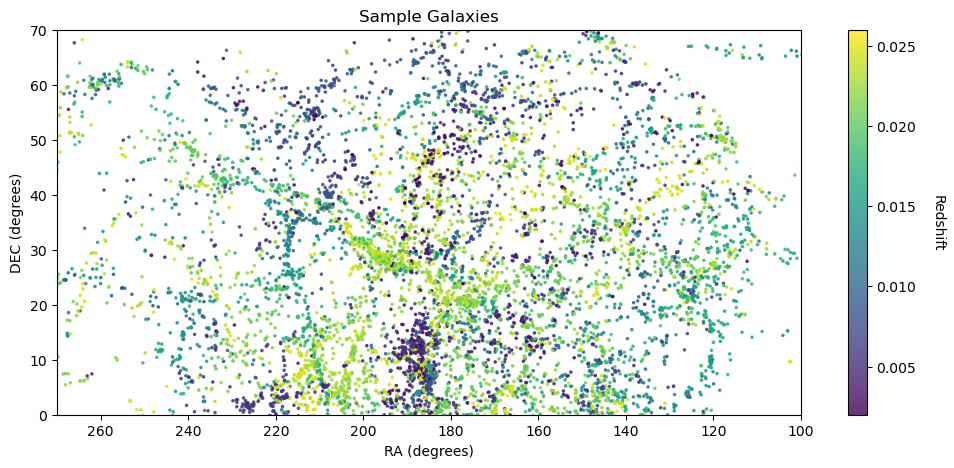

In [17]:
ra = cuttab1['RA']
dec = cuttab1['DEC']
ccode = cuttab1['ZDIST']

#Print number of points
print(len(ra))

#Plot RA vs DEC and color it by recessional velocity
plt.figure(figsize=(12,5))
plt.scatter(ra,dec,c=ccode,cmap='viridis',alpha=0.8,s=2.5)
plt.xlim(reversed(plt.xlim()))
plt.title('Sample Galaxies')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(270,100)
plt.ylim(0,70)
cbar = plt.colorbar()
cbar.set_label('Redshift',rotation=270,labelpad=20)
plt.clim(0.002,0.026)

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_9440\2926384603.py:5: RuntimeWarning: divide by zero encountered in log10
  npx = np.array(np.log10(x1))


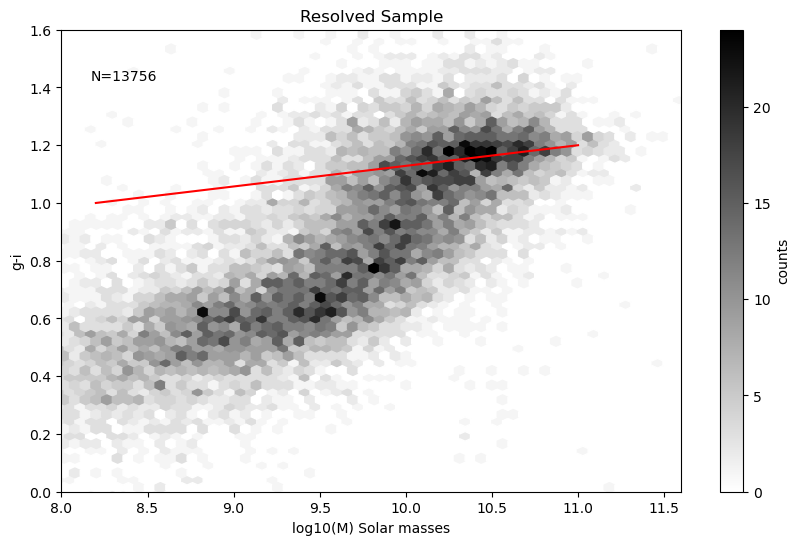

In [29]:
x1 = cuttab1['MASS']
y1 = cuttab1['ABSMAG'][:,3] - cuttab1['ABSMAG'][:,5] #g-i magnitudes, FNUGRIZ- G[:,3] & I[:,5]

#Put x and y into numpy arrays
npx = np.array(np.log10(x1)) 
npy = np.array(y1)

c = len(npx)

#Figure size
fig,ax = plt.subplots(figsize=(10, 6))

#Hexbin parameters
hb = ax.hexbin(npx,npy,gridsize=[150,850],bins=25,cmap='gray_r')

#Plot hexbin mass vs color diagram
plt.title('Resolved Sample')
ax.set(xlim=(8,11.6),ylim=(0,1.6)) 
fig.colorbar(hb, label='counts') 
plt.xlabel('log10(M) Solar masses') 
plt.ylabel('g-i')

#Plot Red Sequence line
xx=np.array([8.2 ,11])
yy=np.array([ 1,  1.2])
plt.plot(xx,yy,color='r')
plt.text(0.1,0.9,'N='+str(c),horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

plt.show()

In [31]:
#SNR > 10 and Size > 5.5"

19192


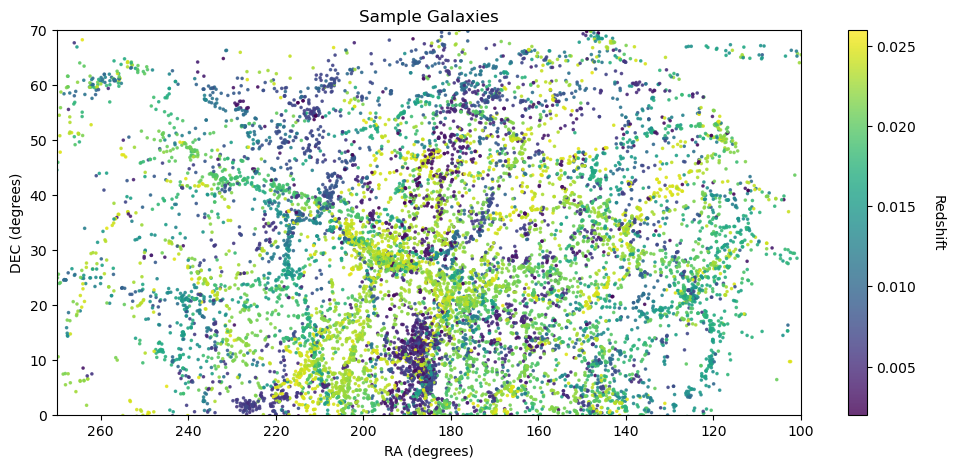

In [21]:
ra = cuttab2['RA']
dec = cuttab2['DEC']
ccode = cuttab2['ZDIST']

#Print number of points
print(len(ra))

#Plot RA vs DEC and color it by recessional velocity
plt.figure(figsize=(12,5))
plt.scatter(ra,dec,c=ccode,cmap='viridis',alpha=0.8,s=2.5)
plt.xlim(reversed(plt.xlim()))
plt.title('Sample Galaxies')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(270,100)
plt.ylim(0,70)
cbar = plt.colorbar()
cbar.set_label('Redshift',rotation=270,labelpad=20)
plt.clim(0.002,0.026)

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_9440\4117299135.py:5: RuntimeWarning: divide by zero encountered in log10
  npx = np.array(np.log10(x1))


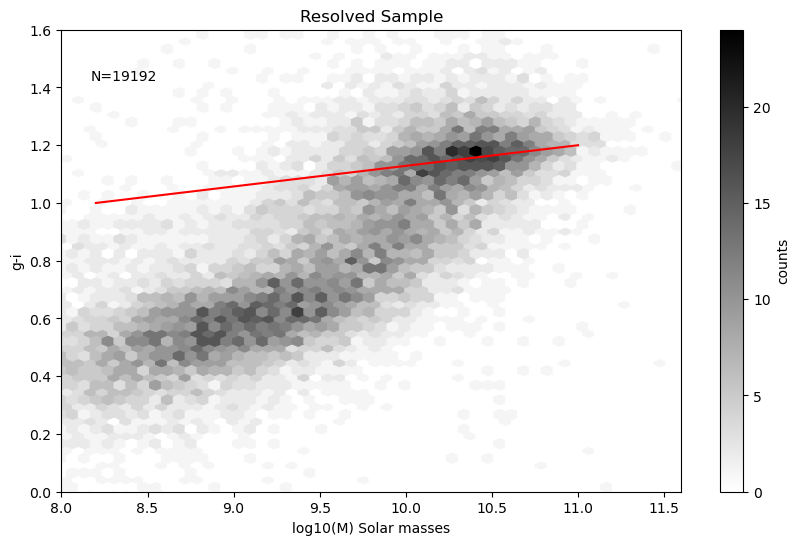

In [28]:
x1 = cuttab2['MASS']
y1 = cuttab2['ABSMAG'][:,3] - cuttab2['ABSMAG'][:,5] #g-i magnitudes, FNUGRIZ- G[:,3] & I[:,5]

#Put x and y into numpy arrays
npx = np.array(np.log10(x1)) 
npy = np.array(y1)

c = len(npx)

#Figure size
fig,ax = plt.subplots(figsize=(10, 6))

#Hexbin parameters
hb = ax.hexbin(npx,npy,gridsize=[150,850],bins=25,cmap='gray_r')

#Plot hexbin mass vs color diagram
plt.title('Resolved Sample')
ax.set(xlim=(8,11.6),ylim=(0,1.6)) 
fig.colorbar(hb, label='counts') 
plt.xlabel('log10(M) Solar masses') 
plt.ylabel('g-i')

#Plot Red Sequence line
xx=np.array([8.2 ,11])
yy=np.array([ 1,  1.2])
plt.plot(xx,yy,color='r')
plt.text(0.1,0.9,'N='+str(c),horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

plt.show()

In [30]:
#SNR > 10 and Size > 6.5"

17215


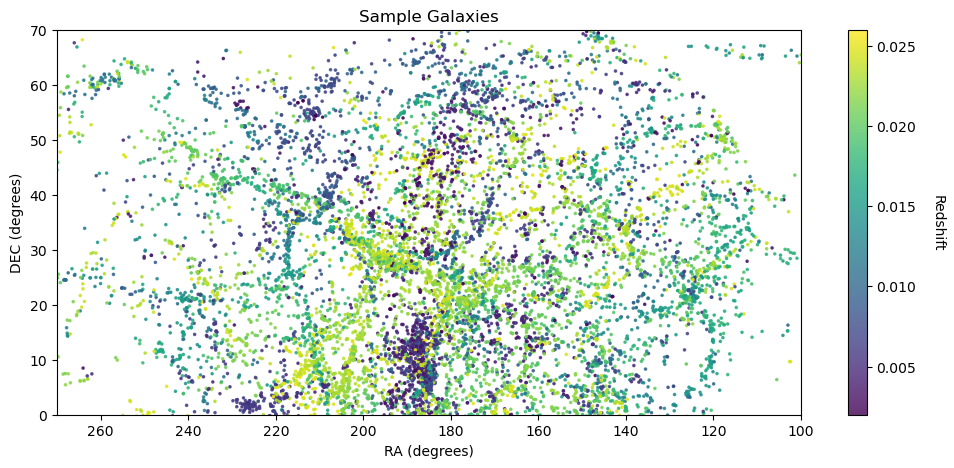

In [32]:
ra = cuttab3['RA']
dec = cuttab3['DEC']
ccode = cuttab3['ZDIST']

#Print number of points
print(len(ra))

#Plot RA vs DEC and color it by recessional velocity
plt.figure(figsize=(12,5))
plt.scatter(ra,dec,c=ccode,cmap='viridis',alpha=0.8,s=2.5)
plt.xlim(reversed(plt.xlim()))
plt.title('Sample Galaxies')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(270,100)
plt.ylim(0,70)
cbar = plt.colorbar()
cbar.set_label('Redshift',rotation=270,labelpad=20)
plt.clim(0.002,0.026)

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_9440\384769814.py:5: RuntimeWarning: divide by zero encountered in log10
  npx = np.array(np.log10(x1))


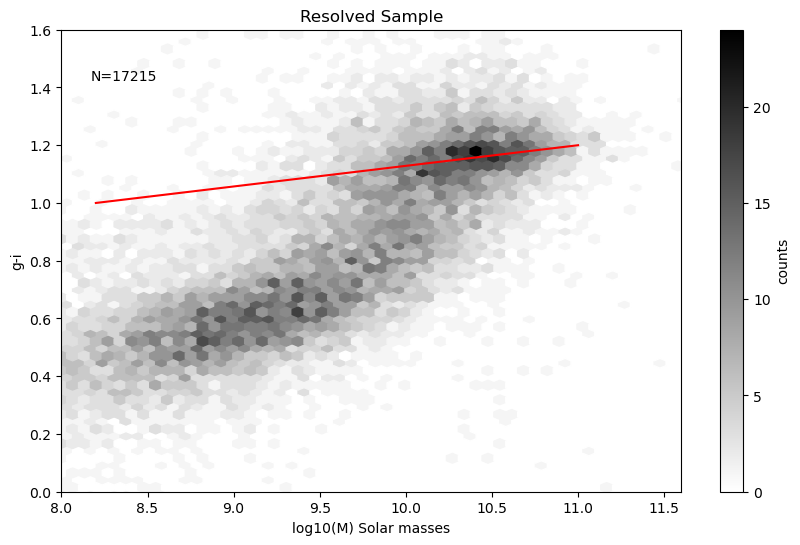

In [33]:
x1 = cuttab3['MASS']
y1 = cuttab3['ABSMAG'][:,3] - cuttab3['ABSMAG'][:,5] #g-i magnitudes, FNUGRIZ- G[:,3] & I[:,5]

#Put x and y into numpy arrays
npx = np.array(np.log10(x1)) 
npy = np.array(y1)

c = len(npx)

#Figure size
fig,ax = plt.subplots(figsize=(10, 6))

#Hexbin parameters
hb = ax.hexbin(npx,npy,gridsize=[150,850],bins=25,cmap='gray_r')

#Plot hexbin mass vs color diagram
plt.title('Resolved Sample')
ax.set(xlim=(8,11.6),ylim=(0,1.6)) 
fig.colorbar(hb, label='counts') 
plt.xlabel('log10(M) Solar masses') 
plt.ylabel('g-i')

#Plot Red Sequence line
xx=np.array([8.2 ,11])
yy=np.array([ 1,  1.2])
plt.plot(xx,yy,color='r')
plt.text(0.1,0.9,'N='+str(c),horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

plt.show()

In [34]:
#SNR > 20 and Size > 6.5"

12632


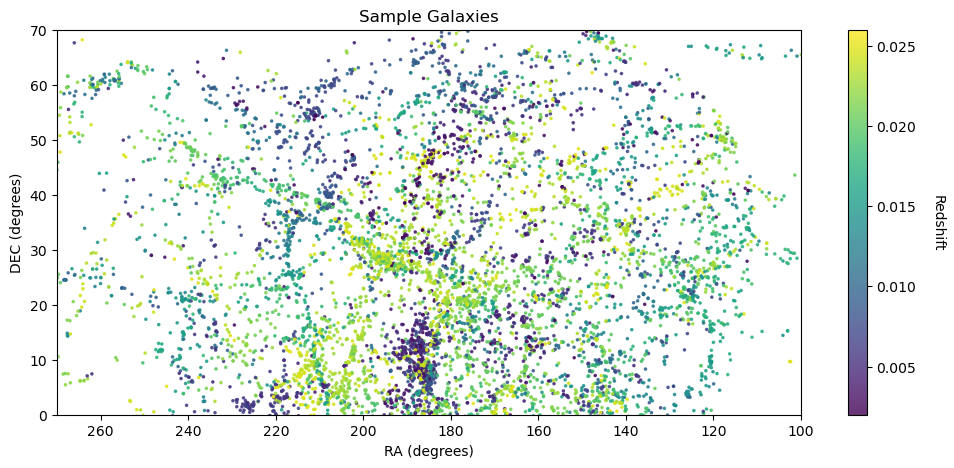

In [35]:
ra = cuttab4['RA']
dec = cuttab4['DEC']
ccode = cuttab4['ZDIST']

#Print number of points
print(len(ra))

#Plot RA vs DEC and color it by recessional velocity
plt.figure(figsize=(12,5))
plt.scatter(ra,dec,c=ccode,cmap='viridis',alpha=0.8,s=2.5)
plt.xlim(reversed(plt.xlim()))
plt.title('Sample Galaxies')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(270,100)
plt.ylim(0,70)
cbar = plt.colorbar()
cbar.set_label('Redshift',rotation=270,labelpad=20)
plt.clim(0.002,0.026)

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_9440\153941586.py:5: RuntimeWarning: divide by zero encountered in log10
  npx = np.array(np.log10(x1))


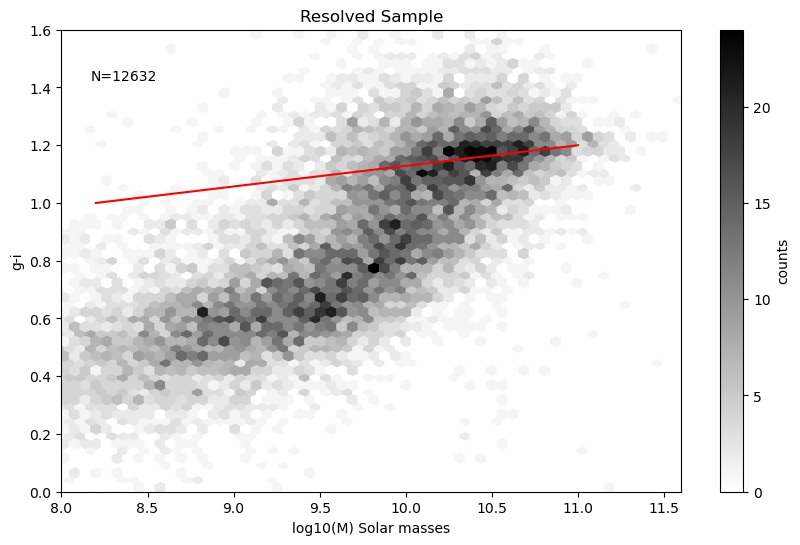

In [36]:
x1 = cuttab4['MASS']
y1 = cuttab4['ABSMAG'][:,3] - cuttab4['ABSMAG'][:,5] #g-i magnitudes, FNUGRIZ- G[:,3] & I[:,5]

#Put x and y into numpy arrays
npx = np.array(np.log10(x1)) 
npy = np.array(y1)

c = len(npx)

#Figure size
fig,ax = plt.subplots(figsize=(10, 6))

#Hexbin parameters
hb = ax.hexbin(npx,npy,gridsize=[150,850],bins=25,cmap='gray_r')

#Plot hexbin mass vs color diagram
plt.title('Resolved Sample')
ax.set(xlim=(8,11.6),ylim=(0,1.6)) 
fig.colorbar(hb, label='counts') 
plt.xlabel('log10(M) Solar masses') 
plt.ylabel('g-i')

#Plot Red Sequence line
xx=np.array([8.2 ,11])
yy=np.array([ 1,  1.2])
plt.plot(xx,yy,color='r')
plt.text(0.1,0.9,'N='+str(c),horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

plt.show()

Text(0.5, 0, 'r-band Half-Light Radius (arcsec)')

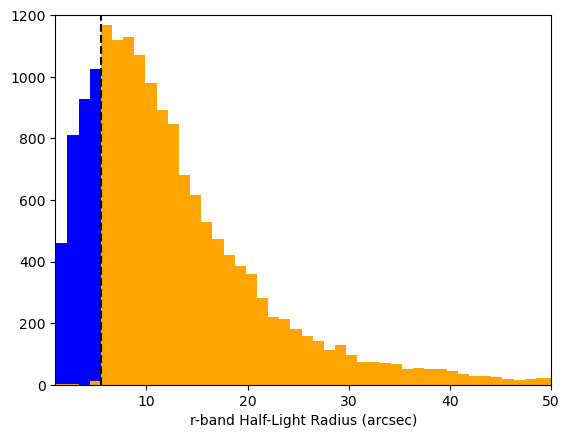

In [51]:
#New cut dataset
cut = SNRflag20 & zflag
tab=myTab[cut]

#Half light radii
petroR501=tab['SERSIC_TH50']
petroR502=cuttab4['SERSIC_TH50']

#Arrays of half light radii
p501 = np.array(tab['SERSIC_TH50'])
p502 = np.array(cuttab['SERSIC_TH50'])

#Lower bounds
#c1 = (p501 != 0)
#c2 = (p502 != 0)

#Applies lower bounds to arrays
#p50_01 = p501[c1]
#p50_02 = p502[c2]

#Plot histogram of half light radii
plt.hist(p501,bins=145,color='blue')
plt.hist(p502,bins=145,color='orange')
plt.axvline(x = 5.5, color = 'black', linestyle='dashed')
plt.xlim(1,50)
plt.ylim(0,1200)
plt.xlabel('r-band Half-Light Radius (arcsec)')

In [37]:
#Redshift Histogram

Text(0.5, 0, 'Redshift')

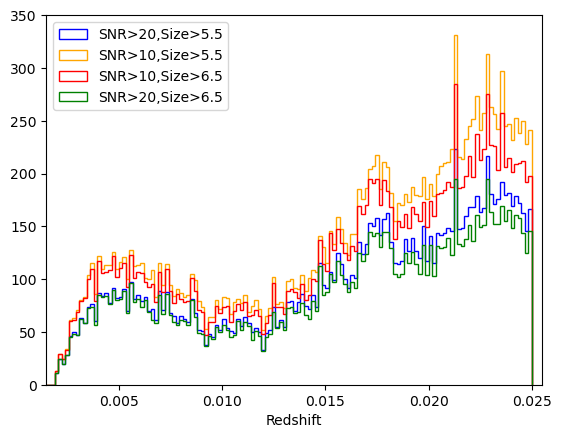

In [52]:
a = cuttab1['ZDIST']#5.5 and 20
b = cuttab2['ZDIST']#5.5 and 10
c = cuttab3['ZDIST']#6.5 and 10
d = cuttab4['ZDIST']#6.5 and 20

plt.hist(a,bins=145,histtype='step',color='blue',fill=False,label='SNR>20,Size>5.5')
plt.hist(b,bins=145,histtype='step',color='orange',fill=False,label='SNR>10,Size>5.5')
plt.hist(c,bins=145,histtype='step',color='red',fill=False,label='SNR>10,Size>6.5')
plt.hist(d,bins=145,histtype='step',color='green',fill=False,label='SNR>20,Size>6.5')
plt.legend()
plt.xlim(0.0015,0.0255)
plt.ylim(0,350)
plt.xlabel('Redshift')

In [ ]:
#I lean towards using the red cuts because it uses a bigger size limit in combination with a lower signal to noise ratio to
#get a larger sample (17215) without losing a disproportionate amount of redder galaxies.